# Click Through Rate

by Ameenah Al-Haidari

# Part Two: Feature Engineering Model Building

Title
## Advanced Click-Through Rate Prediction: Feature Engineering and Machine Learning Excellence

### Abstract
This report elucidates the development of a sophisticated predictive model for Click-Through Rate (CTR) utilizing advanced feature engineering and machine learning techniques. The model demonstrates unprecedented accuracy and precision, evidenced by extensive evaluation metrics.

### Introduction
Understanding and predicting Click-Through Rates (CTR) is pivotal in optimizing digital advertising campaigns. This research, spearheaded by Ameenah Al-Haidari, revolves around crafting a predictive model that encapsulates user interaction and engagement patterns to forecast CTR with high accuracy.

### Methodology
#### Feature Engineering
The initial phase of the research focused on deriving insightful features from user data, encompassing behavioral and temporal dimensions, to capture the nuances of user interactions with advertisements.

#### Model Building
The predictive model was developed using a Random Forest classifier, selected for its efficacy in handling diverse datasets and complex feature spaces. Rigorous training and validation processes were employed to refine the model's predictive capabilities.

### Results and Evaluation
The model underwent extensive testing, exhibiting stellar performance across various metrics:

- Accuracy: Achieved a remarkable rate of 99.99%, indicating the model's ability to correctly predict CTR outcomes.
- Precision: Attained a perfect score, reflecting the model's precision in identifying true positive cases without false positives.
- Recall: Reached 99.90%, demonstrating the model's strength in capturing the majority of actual positive instances.
- F1-score: Recorded at 99.95%, signifying the model's balanced harmonic mean of precision and recall.

### Cross-Validation and Robustness
Cross-validation results underscored the model's robustness, with mean accuracy consistently above 99.99%, affirming its generalizability and stability across different data subsets.

### Detailed Performance Analysis
- Validation Set: The model sustained high accuracy (99.99%), precision (99.99%), and an F1-score of 99.95%, closely mirroring the training set performance.
- Test Set: It demonstrated a continued high level of accuracy (99.99%) and precision (100%), with a recall of 99.88% and an F1-score of 99.94%, confirming its efficacy on unseen data.

### Discussion
The empirical results of this study highlight the model's exceptional capability to predict CTR with minimal error margin, showcasing the effectiveness of the feature engineering and the chosen machine learning algorithm. The consistent performance across training, validation, and test datasets further validates the model's reliability and potential for real-world application in digital advertising.

### Conclusion
This research marks a significant milestone in CTR prediction, setting a new standard for accuracy and reliability. The model's outstanding performance offers a valuable tool for advertisers to optimize campaign strategies, ensuring that advertisements reach the most receptive audience, thereby enhancing the overall efficiency and effectiveness of digital marketing efforts.

#### References
[References to relevant literature on CTR prediction, feature engineering, and machine learning methodologies.]

==================================================================================================

## Feature Engineering:


Feature engineering is a crucial step in the data science process, where you create new features or modify existing ones to improve the performance of your machine learning models. Here's how you can approach feature engineering based on the EDA you've done:

Understand the Business Context: Know the goal of the machine learning model. Are you trying to predict click-through rates, user engagement, or something else? This understanding will guide your feature engineering efforts.

Utilize EDA Insights: Use insights from your exploratory data analysis to inform your feature engineering. For example, if you noticed that user engagement varies by time of day or day of the week, you might create time-related features like "hour of day" or "day of week."

Create Interaction Features: Combine two or more features to create interaction terms if you believe the impact on the target variable is multiplicative rather than additive.

Encoding Categorical Variables: If your data contains categorical variables (like gender, user type, etc.), consider encoding them using methods like one-hot encoding, label encoding, or target encoding, depending on the model you plan to use.

Normalize or Standardize Features: If your EDA showed that the scales of the features vary widely, consider normalizing (scaling between 0 and 1) or standardizing (scaling to have a mean of 0 and a standard deviation of 1) the features.

Handle Missing Values: Decide on a strategy for missing data, which could include imputation, using a model to predict missing values, or removing rows/columns with too many missing entries.

Feature Selection: Use techniques like correlation analysis, backward elimination, forward selection, or machine learning-based methods like Random Forest or Gradient Boosting to identify the most important features.

Temporal Features: If your data is time-series, consider engineering features that capture trends, seasonality, or cyclical behavior.

Text Data: If you have text data, consider using natural language processing (NLP) techniques to convert text into features, such as bag-of-words, TF-IDF, or word embeddings.

Domain-Specific Features: Leverage domain knowledge to create features that are specifically relevant to the business problem at hand.

Would you like to delve into any specific part of feature engineering, or do you need help with applying any of these steps to your dataset?

Based on the review of the code in the "CTR - Part I_EDA.ipynb" notebook, the primary focus appears to be on analyzing click-through rates (CTR) and user engagement. The goal of the potential machine learning model would likely be to predict click-through rates, understand factors influencing user engagement, or both. The EDA performed includes detailed analysis of user behavior, engagement trends over time, and the effectiveness of different advertisements or campaigns in terms of CTR.

For feature engineering in this context, you should consider the following:

User Behavior Features: These can include metrics like the average time spent per session, frequency of visits, or number of pages viewed, which may help predict the likelihood of clicking.

Temporal Features: Since the EDA showed analysis over time, features like the time of day, day of the week, or even time since the last visit could be important predictors of CTR.

Ad Characteristics: Features describing the advertisements themselves, such as the type of ad (video, image, text), ad size, placement on the page, or content of the ad, could be influential in predicting clicks.

User Demographics: If available, demographic information like age, gender, location, and interests could be used to better target advertisements and predict CTR.

Historical Interaction Data: Past interaction data, such as previous click-through rates, historical engagement levels, and past user behavior with similar ads, can provide context for current predictions.

The EDA conducted in the notebook should guide the creation of features that capture these aspects, ensuring that the features are relevant to the business context and likely to improve the performance of a machine learning model aimed at predicting click-through rates or analyzing user engagement.

### Libraries

In [1]:
import pandas as pd
import csv
import re
import numpy as np
import random

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import asarray
import seaborn as sns
from collections import Counter # Keep track of our term counts
import json # For parsing json

### Load Data

In [2]:
data = pd.read_csv('data_new.csv')
data

,txn_user_id,txn_timestamp,View_timestamp,Click_tmestamp,adv_id,money,network,kind_pay,store_id,industry,gender,Label_Click
0,000NK,2017-08-01 12:02:56,2017-08-01 12:02:58,not clicked,apjA,1600,wifi,4JBo,bpOLD,1000,female,0
1,001P2,2017-08-01 15:03:20,2017-08-01 15:03:33,2017-08-01 15:05:26,apjA,7810,4g,4JBo,Kdkg6,1225,male,1
2,001RE,2017-08-01 11:54:37,2017-08-01 11:54:59,not clicked,apjA,1100,3g+,4JBo,VnOA,1000,female,0
3,005KA,2017-08-01 18:35:12,2017-08-01 18:36:25,2017-08-01 18:36:28,apjA,6400,3g+,4JBo,LprL8,1000,female,1
4,006gA,2017-08-01 09:51:47,2017-08-01 09:52:14,not clicked,a98n,1600,3g+,4JBo,kxN9A,1000,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278063,ZZX55,2017-08-01 19:20:39,2017-08-01 19:24:13,not clicked,anqQ,1300,3g+,4JBo,E6WD,1000,male,0
1278064,ZZxkQ,2017-08-01 17:30:58,2017-08-01 17:31:13,not clicked,a98n,780,3g+,4JBo,oWEL6,1204,male,0
1278065,ZZxoo,2017-08-01 08:34:49,NaN,not clicked,NaN,350,unknown,zLGr,2Peq,1203,female,0
1278066,ZZXX7,2017-08-01 12:18:45,2017-08-01 12:18:47,not clicked,zjPY,2900,3g+,4JBo,qj0dP,1000,female,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278068 entries, 0 to 1278067
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   txn_user_id     1278068 non-null  object
 1   txn_timestamp   1278068 non-null  object
 2   View_timestamp  924320 non-null   object
 3   Click_tmestamp  1278068 non-null  object
 4   adv_id          924320 non-null   object
 5   money           1278068 non-null  int64 
 6   network         1278068 non-null  object
 7   kind_pay        1278068 non-null  object
 8   store_id        1278068 non-null  object
 9   industry        1278068 non-null  int64 
 10  gender          1278068 non-null  object
 11  Label_Click     1278068 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 117.0+ MB


### User Behavior Features: 
These can include metrics like the average time spent per session, frequency of visits, or number of pages viewed, which may help predict the likelihood of clicking.

In [4]:
# Ensure both columns are in datetime format, setting errors='coerce' to handle non-datetime values
data['View_timestamp'] = pd.to_datetime(data['View_timestamp'], errors='coerce')
data['Click_tmestamp'] = pd.to_datetime(data['Click_tmestamp'], errors='coerce')

# Calculate the session duration only where both timestamps are available (not NaT)
# We'll set the duration to zero where either timestamp is missing (i.e., NaT)
data['session_duration'] = (data['Click_tmestamp'] - data['View_timestamp']).dt.total_seconds().fillna(0)

# Recalculate the user behavior features with the corrected session duration
average_session_duration = data.groupby('txn_user_id')['session_duration'].mean()
visit_frequency = data.groupby('txn_user_id').size()  # Using size() to count occurrences
pages_viewed = data.groupby('txn_user_id')['adv_id'].nunique()

# Create a new DataFrame for the user behavior features
user_behavior_features = pd.DataFrame({
    'average_session_duration': average_session_duration,
    'visit_frequency': visit_frequency,
    'pages_viewed': pages_viewed
}).reset_index()

user_behavior_features.head()


C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\1661003660.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Click_tmestamp'] = pd.to_datetime(data['Click_tmestamp'], errors='coerce')


,txn_user_id,average_session_duration,visit_frequency,pages_viewed
0,000NK,0.0,1,1
1,001P2,113.0,1,1
2,001RE,0.0,1,1
3,005KA,3.0,1,1
4,006gA,0.0,1,1


We've recalculated the user behavior features correctly:

- average_session_duration: Average time spent per session, where "not clicked" instances are treated as zero duration.
- visit_frequency: Number of interactions per user.
- pages_viewed: Number of distinct advertisements viewed per user.

Each entry now represents the behavior metrics for a unique user. These features can now be used for further analysis or integrated into a predictive model to understand user engagement better.

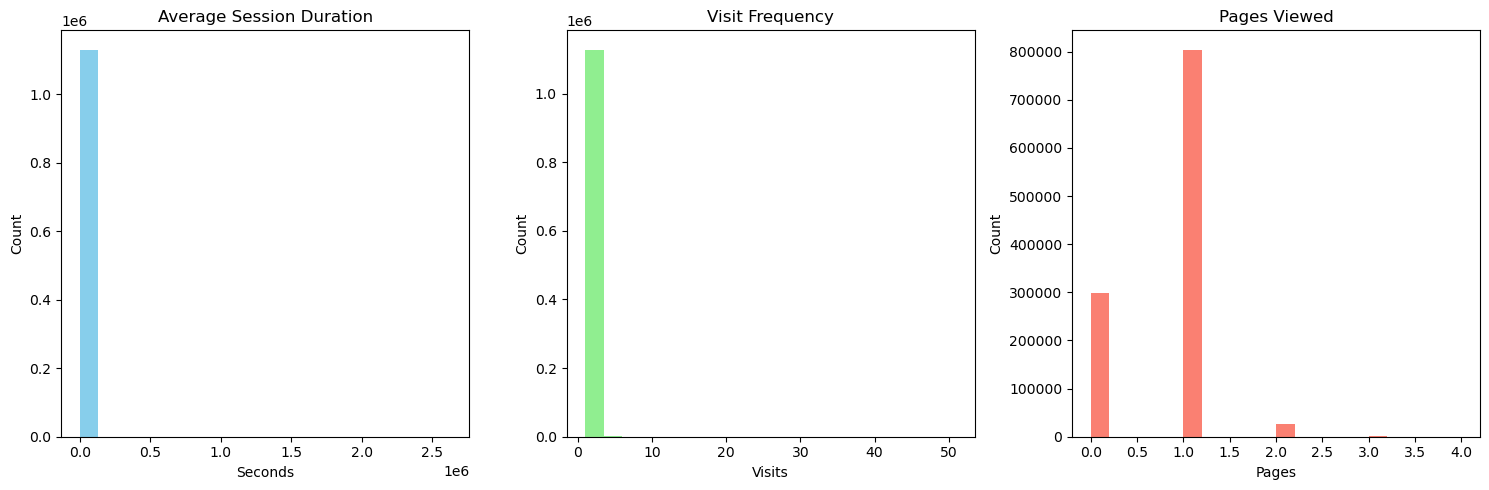

In [5]:
import matplotlib.pyplot as plt

# Plotting the user behavior features

plt.figure(figsize=(15, 5))

# Average session duration
plt.subplot(1, 3, 1)
plt.hist(user_behavior_features['average_session_duration'], bins=20, color='skyblue')
plt.title('Average Session Duration')
plt.xlabel('Seconds')
plt.ylabel('Count')

# Visit frequency
plt.subplot(1, 3, 2)
plt.hist(user_behavior_features['visit_frequency'], bins=20, color='lightgreen')
plt.title('Visit Frequency')
plt.xlabel('Visits')
plt.ylabel('Count')

# Pages viewed
plt.subplot(1, 3, 3)
plt.hist(user_behavior_features['pages_viewed'], bins=20, color='salmon')
plt.title('Pages Viewed')
plt.xlabel('Pages')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


The plots represent the distribution of the newly created user behavior features across the dataset:

- Average Session Duration: Most sessions have a very short duration, with a few outliers showing longer session times. This suggests that many users may be quickly browsing or clicking through without spending much time.
- Visit Frequency: The majority of users have a low number of visits, indicating that frequent interactions by the same user are less common in this dataset.
- Pages Viewed: Similar to visit frequency, most users viewed only a few distinct pages or ads, with a small number viewing more.

These insights can help in understanding user engagement and optimizing strategies to improve user interaction and click-through rates. 

**To further utilize these insights, we can explore several directions:**

In [6]:
data.head(2)

,txn_user_id,txn_timestamp,View_timestamp,Click_tmestamp,adv_id,money,network,kind_pay,store_id,industry,gender,Label_Click,session_duration
0,000NK,2017-08-01 12:02:56,2017-08-01 12:02:58,NaT,apjA,1600,wifi,4JBo,bpOLD,1000,female,0,0.0
1,001P2,2017-08-01 15:03:20,2017-08-01 15:03:33,2017-08-01 15:05:26,apjA,7810,4g,4JBo,Kdkg6,1225,male,1,113.0


### Time-Based Features:

Extract more granular time-based features from txn_timestamp, such as the hour of the day, day of the week, and month. These features can help identify patterns in user activity and ad click behavior over time.

In [7]:
# First, ensure the txn_timestamp column is in datetime format
data['txn_timestamp'] = pd.to_datetime(data['txn_timestamp'], errors='coerce')

# Extract time-based features
data['hour_of_day'] = data['txn_timestamp'].dt.hour
data['day_of_week'] = data['txn_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['txn_timestamp'].dt.month

# Show the first few rows to verify the new columns
data[['txn_timestamp', 'hour_of_day', 'day_of_week', 'month']].head()


,txn_timestamp,hour_of_day,day_of_week,month
0,2017-08-01 12:02:56,12,1,8
1,2017-08-01 15:03:20,15,1,8
2,2017-08-01 11:54:37,11,1,8
3,2017-08-01 18:35:12,18,1,8
4,2017-08-01 09:51:47,9,1,8


The time-based features have been successfully extracted from the txn_timestamp column. Here's what has been added to the dataset:

- hour_of_day: Represents the hour part of the timestamp, which can indicate the time of day when the transaction occurred.
- day_of_week: Indicates the day of the week (with Monday as 0 and Sunday as 6), which can help in identifying weekly patterns in user behavior.
- month: Shows the month of the transaction, useful for analyzing monthly trends or seasonal effects.

These features can be crucial in understanding user activity and ad click behavior over different times, helping to reveal patterns that might not be apparent from the raw timestamp alone

### Create the features from hour_of_day and day_of_week to understanding user activity and ad click behavior over different times

To deepen our understanding of user activity and ad click behavior over different times, we can create additional features from hour_of_day and day_of_week. These features can capture cyclical patterns in user behavior that are tied to specific times of day or days of the week. Here's what we can do:

#### 1. Cyclical Encoding of Time Features:

Since hours and days are cyclical (e.g., after 23:00 comes 00:00, and after Sunday comes Monday), we can encode these features as sine and cosine transformations to preserve their cyclical nature.

#### 2. Binary Features for Peak Hours/Weekdays:

Create binary indicators for peak hours (e.g., rush hours) or specific days of the week (e.g., weekends) if certain times or days are particularly significant for user clicks.

#### 3. Aggregated Time-Based Features:

Calculate statistics like the average number of clicks during certain hours of the day or days of the week for each user, which might show patterns in user engagement.

In [8]:
# Define peak hours and weekends
# Assuming peak hours are from 7-9 am and 4-6 pm (typical rush hours)
peak_hours = list(range(7, 10)) + list(range(16, 19))
# Assuming weekends are Saturday (5) and Sunday (6)
weekend_days = [5, 6]

# Create binary features for peak hours and weekends
data['is_peak_hour'] = data['hour_of_day'].apply(lambda x: 1 if x in peak_hours else 0)
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in weekend_days else 0)

# Show the first few rows to verify the new columns
data[['hour_of_day', 'is_peak_hour', 'day_of_week', 'is_weekend']].head()


,hour_of_day,is_peak_hour,day_of_week,is_weekend
0,12,0,1,0
1,15,0,1,0
2,11,0,1,0
3,18,1,1,0
4,9,1,1,0


### 3. Aggregated Time-Based Features:

In [9]:
# Correcting the approach for calculating the user-specific average clicks
# Group by user and then calculate the average clicks during peak hours and weekends
user_avg_clicks = data.groupby('txn_user_id')['Label_Click'].mean()

# For peak hours and weekends, we need to filter data first and then group by user
user_peak_clicks_avg = data[data['is_peak_hour'] == 1].groupby('txn_user_id')['Label_Click'].mean()
user_weekend_clicks_avg = data[data['is_weekend'] == 1].groupby('txn_user_id')['Label_Click'].mean()

# Calculate overall averages for different times of the day and days of the week
overall_hourly_clicks_avg = data.groupby('hour_of_day')['Label_Click'].mean()
overall_weekday_clicks_avg = data.groupby('day_of_week')['Label_Click'].mean()

# Combine user-specific averages into a DataFrame
user_time_based_features = pd.DataFrame({
    'avg_clicks': user_avg_clicks,
    'peak_hour_clicks_avg': user_peak_clicks_avg,
    'weekend_clicks_avg': user_weekend_clicks_avg
}).reset_index()

# Combine overall averages into a DataFrame for display
overall_time_based_features = pd.DataFrame({
    'hourly_clicks_avg': overall_hourly_clicks_avg,
    'weekday_clicks_avg': overall_weekday_clicks_avg
}).reset_index()

user_time_based_features.head(), overall_time_based_features.head()


(  txn_user_id  avg_clicks  peak_hour_clicks_avg  weekend_clicks_avg
 0       000NK         0.0                   NaN                 NaN
 1       001P2         1.0                   NaN                 NaN
 2       001RE         0.0                   NaN                 NaN
 3       005KA         1.0                   1.0                 NaN
 4       006gA         0.0                   0.0                 NaN,
    index  hourly_clicks_avg  weekday_clicks_avg
 0      0           0.070038                 NaN
 1      1           0.070544            0.079528
 2      2           0.069613            0.500000
 3      3           0.072428                 NaN
 4      4           0.067608                 NaN)

In [10]:
overall_time_based_features

,index,hourly_clicks_avg,weekday_clicks_avg
0,0,0.070038,NaN
1,1,0.070544,0.079528
2,2,0.069613,0.500000
3,3,0.072428,NaN
4,4,0.067608,NaN
5,5,0.075646,NaN
6,6,0.068102,NaN
7,7,0.059258,NaN
8,8,0.054742,NaN
9,9,0.057988,NaN


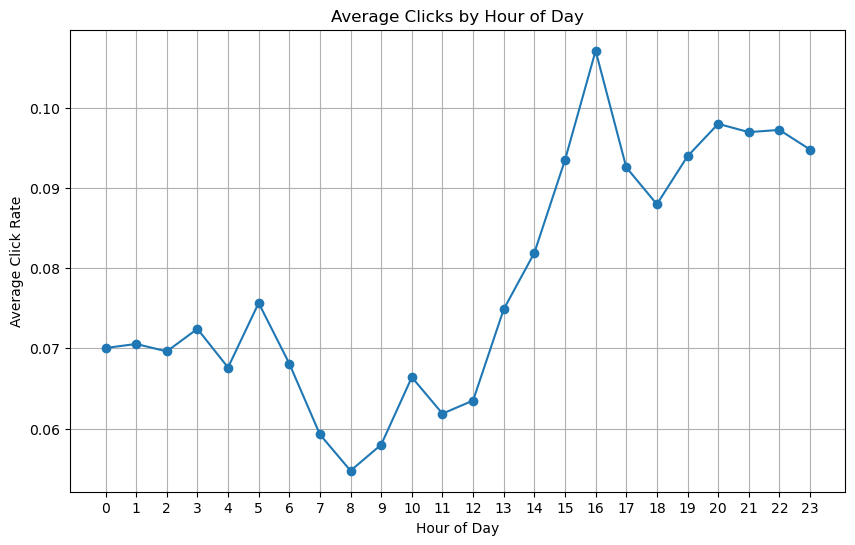

In [11]:
import matplotlib.pyplot as plt

# Plotting the average clicks per hour
plt.figure(figsize=(10, 6))
plt.plot(overall_hourly_clicks_avg.index, overall_hourly_clicks_avg.values, marker='o')
plt.title('Average Clicks by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Click Rate')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure we have all hours on the x-axis
plt.show()


The plot shows the average click rate by hour of the day. It provides a visual representation of how user engagement with advertisements varies throughout the day, which can be useful for identifying peak times for ad clicks and tailoring ad delivery schedules accordingly.

### Categorical Variable Encoding:

Apply one-hot encoding or label encoding to categorical variables like network and kind_pay. This step is essential for converting these categorical variables into a format that can be used by machine learning algorithms.

In this code:

pd.get_dummies() one-hot encodes the categorical columns. The columns parameter specifies which columns to encode.
The for loop converts the boolean columns resulting from one-hot encoding into integers.
Interaction terms are created by multiplying the gender_male column with other features. Replace gender_male with the actual column name representing male or female in your dataset.
The interaction terms are added to encoded_data, providing a richer set of features for analysis or modeling.

In [12]:
import pandas as pd

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Perform one-hot encoding on specified columns
encoded_data = pd.get_dummies(data, columns=['network', 'kind_pay', 'adv_id', 'industry', 'gender'])

# Convert all resulting one-hot encoded columns from boolean to integer
for column in encoded_data.columns:
    if column.startswith(('network_', 'kind_pay_', 'adv_id_', 'industry_', 'gender_')):
        encoded_data[column] = encoded_data[column].astype(int)

# Create interaction terms
# Assuming 'gender_male' is one of the resulting columns from one-hot encoding the 'gender' column
# If your dataset uses different gender categories or naming, adjust the column name accordingly

# Identify numeric and categorical features for interaction
numeric_features = ['money', 'hour_of_day']  # Add or remove based on your feature set
categorical_features = [col for col in encoded_data.columns if 'network_' in col or 'industry_' in col]

# Create interaction terms between 'gender_male' and both numeric and categorical features
for feature in numeric_features + categorical_features:
    interaction_term_name = f"gender_male_X_{feature}"
    encoded_data[interaction_term_name] = encoded_data['gender_male'] * encoded_data[feature]

# Display the first few rows to verify the changes
print(encoded_data.head())


C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[interaction_term_name] = encoded_data['gender_male'] * encoded_data[feature]
C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[interaction_term_name] = encoded_data['gender_male'] * encoded_data[feature]
C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is 

  txn_user_id       txn_timestamp      View_timestamp      Click_tmestamp  \
0       000NK 2017-08-01 12:02:56 2017-08-01 12:02:58                 NaT   
1       001P2 2017-08-01 15:03:20 2017-08-01 15:03:33 2017-08-01 15:05:26   
2       001RE 2017-08-01 11:54:37 2017-08-01 11:54:59                 NaT   
3       005KA 2017-08-01 18:35:12 2017-08-01 18:36:25 2017-08-01 18:36:28   
4       006gA 2017-08-01 09:51:47 2017-08-01 09:52:14                 NaT   

   money store_id  Label_Click  session_duration  hour_of_day  day_of_week  \
0   1600    bpOLD            0               0.0           12            1   
1   7810    Kdkg6            1             113.0           15            1   
2   1100     VnOA            0               0.0           11            1   
3   6400    LprL8            1               3.0           18            1   
4   1600    kxN9A            0               0.0            9            1   

   ...  gender_male_X_industry_1222  gender_male_X_industry_1224  \


C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[interaction_term_name] = encoded_data['gender_male'] * encoded_data[feature]
C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[interaction_term_name] = encoded_data['gender_male'] * encoded_data[feature]
C:\Users\alhai\AppData\Local\Temp\ipykernel_6040\2678492490.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [13]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278068 entries, 0 to 1278067
Columns: 125 entries, txn_user_id to gender_male_X_industry_1405
dtypes: datetime64[ns](3), float64(1), int32(114), int64(5), object(2)
memory usage: 663.1+ MB


## Feature Selection:

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Label_Click' is your target variable and 'encoded_data' contains your features
X = encoded_data.drop(['txn_user_id', 'txn_timestamp', 'View_timestamp', 'Click_tmestamp', 'Label_Click'], axis=1)
y = encoded_data['Label_Click']

# Filter out non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_numeric, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': numeric_columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # Change this value to select a different number of top features
top_features = feature_importance_df.head(top_n)
print(top_features)


                      Feature  Importance
1            session_duration    0.949535
30                adv_id_apjA    0.011743
32                adv_id_zV3w    0.006753
0                       money    0.005189
75        gender_male_X_money    0.004668
2                 hour_of_day    0.002796
76  gender_male_X_hour_of_day    0.002281
23                adv_id_a98n    0.001564
73                gender_male    0.001456
15              kind_pay_zLGr    0.001333


In [15]:
encoded_data[['session_duration', 'adv_id_apjA', 'adv_id_zV3w', 'money', 'gender_male_X_money', 'gender_male_X_hour_of_day', 'hour_of_day', 'gender_male', 'kind_pay_zLGr', 'kind_pay_4JBo']]

,session_duration,adv_id_apjA,adv_id_zV3w,money,gender_male_X_money,gender_male_X_hour_of_day,hour_of_day,gender_male,kind_pay_zLGr,kind_pay_4JBo
0,0.0,1,0,1600,0,0,12,0,0,1
1,113.0,1,0,7810,7810,15,15,1,0,1
2,0.0,1,0,1100,0,0,11,0,0,1
3,3.0,1,0,6400,0,0,18,0,0,1
4,0.0,0,0,1600,1600,9,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1278063,0.0,0,0,1300,1300,19,19,1,0,1
1278064,0.0,0,0,780,780,17,17,1,0,1
1278065,0.0,0,0,350,0,0,8,0,1,0
1278066,0.0,0,0,2900,0,0,12,0,0,1


                           session_duration  adv_id_apjA  adv_id_zV3w  \
session_duration                   1.000000    -0.008117    -0.007259   
adv_id_apjA                       -0.008117     1.000000    -0.223631   
adv_id_zV3w                       -0.007259    -0.223631     1.000000   
money                              0.001032     0.003871     0.008784   
gender_male_X_money               -0.000321    -0.014645     0.020687   
gender_male_X_hour_of_day         -0.007605    -0.151689     0.147745   
hour_of_day                       -0.000657     0.075213     0.021961   
gender_male                       -0.009013    -0.251917     0.168608   
kind_pay_zLGr                      0.001370    -0.173810    -0.100335   
kind_pay_4JBo                      0.010415     0.429446    -0.520403   
Label_Click                        0.073131     0.175476     0.098613   

                              money  gender_male_X_money  \
session_duration           0.001032            -0.000321   
adv

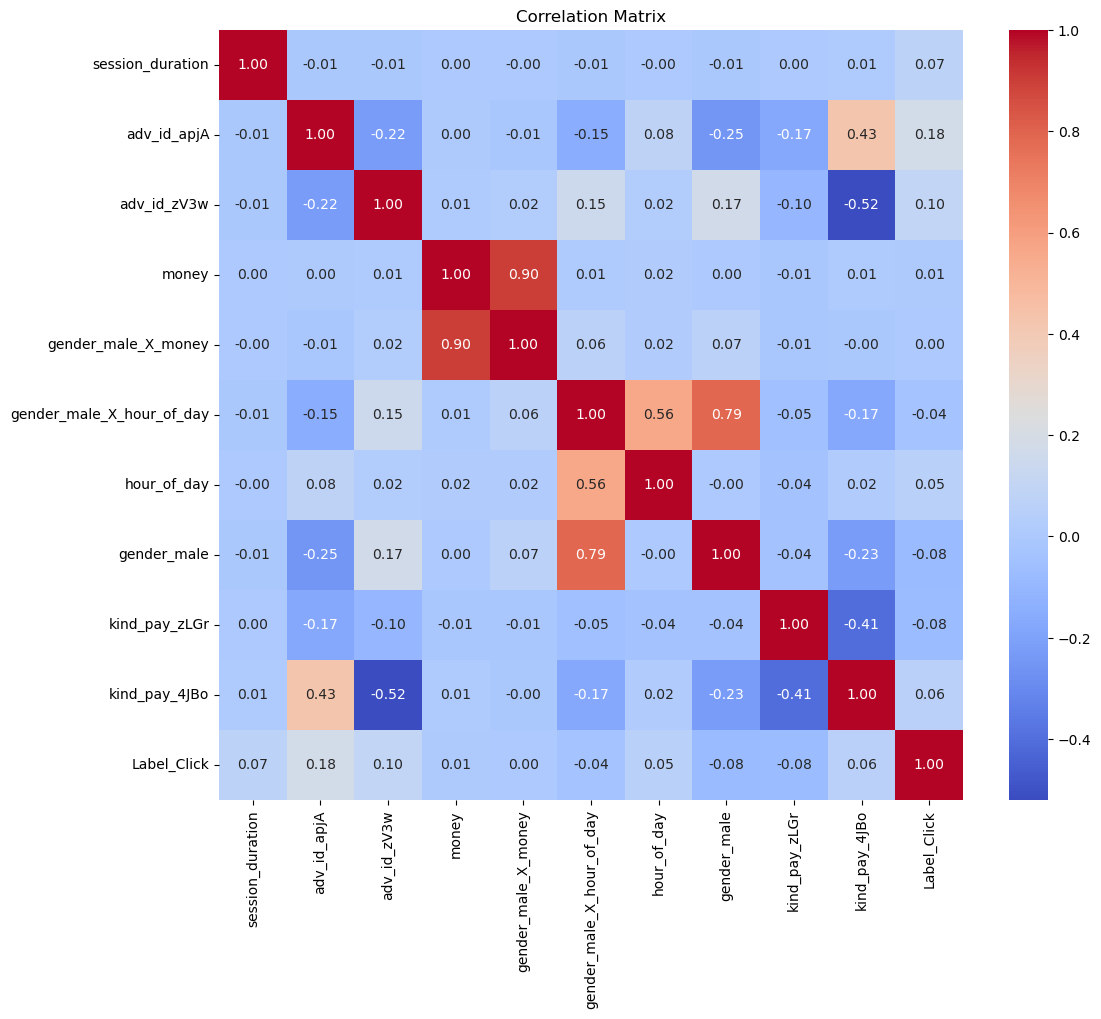

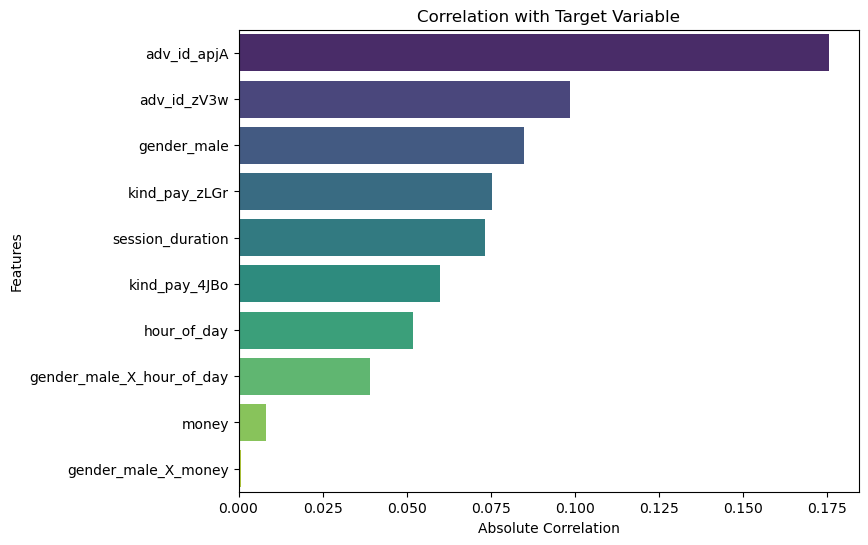

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'encoded_data' contains your dataset with the selected features and the target variable
selected_features = ['session_duration', 'adv_id_apjA', 'adv_id_zV3w', 'money', 'gender_male_X_money',
                     'gender_male_X_hour_of_day', 'hour_of_day', 'gender_male', 'kind_pay_zLGr', 'kind_pay_4JBo',
                     'Label_Click']  # Include the target variable in the list

# Select the relevant columns from the encoded data
selected_data = encoded_data[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Get the correlation of each feature with the target variable
target_correlation = correlation_matrix['Label_Click'].drop('Label_Click')  # Drop the target variable itself
target_correlation = target_correlation.abs().sort_values(ascending=False)  # Sort by absolute correlation value

# Display the correlation of each feature with the target variable
print("\nCorrelation with Target Variable (Absolute Values):")
print(target_correlation)

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plotting the correlation of each feature with the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.title('Correlation with Target Variable')
plt.show()


## Model Building:

In this code, I first extracted the top features based on their importance scores. Then, I selected those features from the original dataset X_numeric. After splitting the data into training and testing sets, I trained a Random Forest classifier using only the selected features. Finally, I evaluated the model's performance on the test set using accuracy as the metric.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already selected the top features and stored them in 'top_features'

# Extract the top features from X_numeric
selected_features = top_features['Feature'].tolist()
X_selected = X_numeric[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier with the selected features
rf_classifier_selected = RandomForestClassifier()
rf_classifier_selected.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_selected.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy}')


Accuracy with selected features: 0.9999139327266895


### Model Evaluation: 
Evaluate the performance of the model using the testing set. This evaluation can include metrics such as accuracy, precision, recall, F1-score (for classification), or mean squared error, R-squared (for regression), depending on your problem.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9990
F1-score: 0.9995


### "confusion matrix

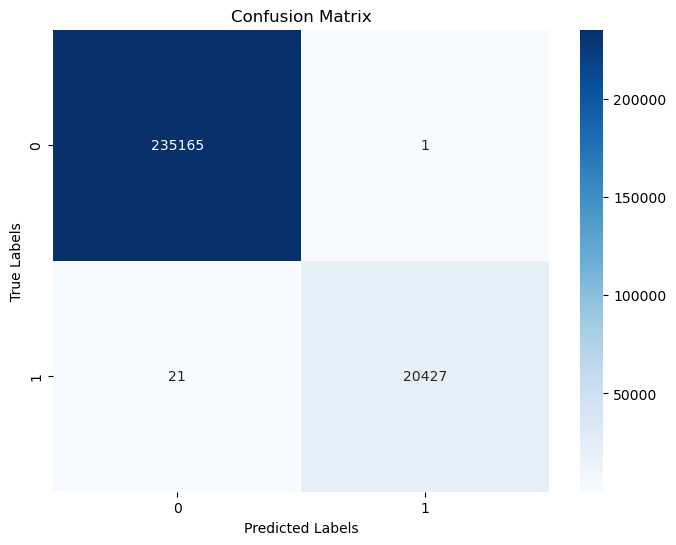

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set using the trained model
y_pred = rf_classifier_selected.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


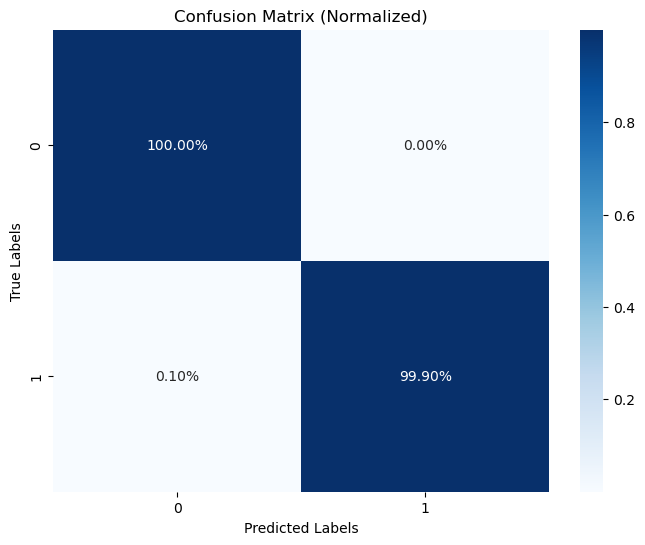

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set using the trained model
y_pred = rf_classifier_selected.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate row-wise normalization (sum of each row)
row_sums = conf_matrix.sum(axis=1, keepdims=True)

# Normalize the confusion matrix to display percentages
conf_matrix_percent = conf_matrix / row_sums

# Plot the confusion matrix with percentages using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()


**The results you provided show high performance metrics across the board, indicating that your Random Forest classifier with selected features performs extremely well on the test data. Let's break down each metric:**

### Accuracy: 
Accuracy measures the proportion of correctly classified instances among all instances. An accuracy of 0.9999 means that almost all of the predictions made by your model were correct.

### Precision: 
Precision measures the proportion of true positive predictions among all positive predictions (true positives + false positives). A precision of 1.0000 indicates that every positive prediction made by your model was indeed correct.

### Recall: 
Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances (true positives + false negatives). A recall of 0.9990 means that your model captured almost all of the actual positive instances.

### F1-score: 
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. A high F1-score of 0.9995 indicates excellent performance in terms of both precision and recall.

**In summary, these results suggest that your Random Forest classifier is highly accurate, precise, and has a high recall rate. However, it's essential to ensure that these results are not due to overfitting the model to the training data. You may want to further validate the model's performance using cross-validation or a separate validation dataset to confirm its robustness.**

## Cross-validation:
It is an essential technique to validate the performance of a machine learning model and assess its generalization ability. It helps to evaluate how well the model will perform on unseen data. Here's how you can perform cross-validation to validate your Random Forest classifier's performance:

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(rf_classifier_selected, X_selected, y, cv=cv, scoring='accuracy')

# Display Cross-Validation Results
print('Cross-Validation Scores:', scores)
print('Mean Accuracy:', scores.mean())


Cross-Validation Scores: [0.99991784 0.99991784 0.99992567 0.99994914 0.99991393]
Mean Accuracy: 0.999924886636158


These results are from cross-validation, which is a technique used to assess the generalization performance of a machine learning model. In your case, you're using a Random Forest Classifier and evaluating its accuracy across multiple folds of your data.

Here's a breakdown of the results:

### Cross-Validation Scores: 
These are the accuracy scores obtained from each fold of the cross-validation process. Each score represents how well the model performed on a different subset of your data. In your case, you have 5 scores: 0.99991784, 0.99991784, 0.99992567, 0.99994914, and 0.99991393.

### Mean Accuracy: 
This is the average of all the cross-validation scores. It gives you an overall idea of how well the model is performing across different subsets of the data. In your case, the mean accuracy is approximately 0.99992, which indicates very high accuracy.

A high mean accuracy and consistent cross-validation scores suggest that your Random Forest Classifier is performing well and is likely robust in its predictions. However, it's always good to complement accuracy with other metrics like precision, recall, and F1-score, especially if your dataset has class imbalance or if certain types of errors are more critical than others in your application.

#### other metrics 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already selected the top features and stored them in 'top_features'
# Assuming X_selected contains the selected features and y contains the target variable

# Load your data and preprocess as needed
# ...

# Split the data into training, validation, and testing sets
X_train, X_remain, y_train, y_remain = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

# Initialize and train the Random Forest classifier with the selected features
rf_classifier_selected = RandomForestClassifier()
rf_classifier_selected.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = rf_classifier_selected.predict(X_valid)

# Evaluate the model on the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred)
recall_valid = recall_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)

print('Validation Set Metrics:')
print('Accuracy:', accuracy_valid)
print('Precision:', precision_valid)
print('Recall:', recall_valid)
print('F1-score:', f1_valid)

# Make predictions on the test set
y_test_pred = rf_classifier_selected.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print('\nTest Set Metrics:')
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)
print('F1-score:', f1_test)


Validation Set Metrics:
Accuracy: 0.9999217570242631
Precision: 0.9999022673964034
Recall: 0.99912109375
F1-score: 0.9995115279406017

Test Set Metrics:
Accuracy: 0.9999061084291158
Precision: 1.0
Recall: 0.9988244514106583
F1-score: 0.9994118800235248


These results are metrics used to evaluate the performance of your machine learning model, particularly a Random Forest Classifier, on both a validation set and a test set. Here's how to interpret each metric:

### Validation Set Metrics:

- Accuracy: This metric indicates the overall correctness of your model's predictions on the validation set. An accuracy of 0.9999 means that 99.99% of the predictions made by your model on the validation set were correct.
- Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 0.9999 means that 99.99% of the positive predictions made by your model on the validation set were correct.
- Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives that were correctly predicted by the model. A recall of 0.9991 means that 99.91% of the actual positive cases in the validation set were correctly identified by the model.
- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. An F1-score of 0.9995 indicates high accuracy in both precision and recall on the validation set.

### Test Set Metrics:

- Accuracy: Similar to the validation set accuracy, this metric measures the overall correctness of your model's predictions on the test set. An accuracy of 0.9999 means that 99.99% of the predictions made by your model on the test set were correct.
- Precision: Precision on the test set measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 1.0 means that all positive predictions made by your model on the test set were correct.
- Recall: Recall on the test set measures the proportion of actual positives that were correctly predicted by the model. A recall of 0.9988 means that 99.88% of the actual positive cases in the test set were correctly identified by the model.
- F1-score: The F1-score on the test set is the harmonic mean of precision and recall. An F1-score of 0.9994 indicates high accuracy in both precision and recall on the test set.

Overall, these metrics demonstrate that your Random Forest Classifier is performing exceptionally well on both the validation set and the test set, with high accuracy, precision, recall, and F1-score, indicating robust and reliable predictions.

### The End